# Video Game Sales

## Intro

In this special hard time of pandemic, playing games is one of the most popular choices during quarantine. With the development of technology, the gaming industry is growing prosperously. There are a lot of professional contests for gamers and gaming has even been introduced into Olympic, which shows its importance. More and more games have been published in recent years and the gaming market seems to come close to a saturation. We would like to see if there is still some potential in developing the gaming market. We wonder, then, how is the sales of the games this year, and what factor will influence it.

This tutorial will explore the sales of video games, and its relation to genre, platform, released days and publisher.

Please use the table of contents below for your convenience.
* [Data Collection and Manipulation](#chapter1)
* [Data Visualization](#chapter2)
    * [Number of games in Top 200 Best-Seller released by each publisher](#section_1_1)
    * [Total sales of each publisher](#section_1_2)
    * [Sales of each publisher by region](#section_1_3)
    * [Total sales by region](#section_1_4)
    * [Released days with total sales for each region](#section_1_5)
    * [Sales of games by release year](#section_1_6)
    * [Number of games released by year](#section_1_7)
    * [Genre and Sales](#section_1_8)
    * [Platform and Sales](#section_1_9)
* [Data Analysis](#chapter3)
    * [Linear Regression](#section_2_2)
    * [Quadratic (Polynomial) Regression](#section_2_3)
    * [Stochastic Gradient Descent](#section_2_4)
    * [OLS Regression](#section_2_1)
* [Conclusion](#chapter4)
* [Other link](#chapter5)

Author: Yiying Tao & Shihua You

## Data Collection and Manipulation  <a class="anchor" id="chapter1"></a>

Data Source: <br>
We have scraped some data of top selling video games (as of 2020/12) from http://www.vgchartz.com/gamedb/. Since this tutorial will focus on analyzing the data rather than scraping the data from the website, we used a Chrome Extension called Instant Data Scraper (https://chrome.google.com/webstore/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah?hl=en-US) to help us scrape the data from the website. <br>
<br>
The fields include the following: <br>
Index - Ranking of overall sales; <br>
Game - Name of the game; <br>
Publisher - Publisher of the game; <br>
TotalSales - Sales in worldwide (in millions); <br>
NASales - Sales in North America (in millions); <br>
PALSales - Sales in Phase Alternating Line Regions, which covers most of Asia, Africa, Europe, South America and Oceania (in millions); <br>
JPSales - Sales in Japan (in millions); <br>
OtherSales - Sales in the rest of the world (in millions); <br>
ReleaseDate - The date when the game was firstly published; <br>
LinkToPage - The link to information page for each game;<br>
DaysReleased - The length of time from the game was firstly published to today;
Platform - The computer system specially made for playing video games;
Genre - The type of the game;
Year - The year that the game is released.

In [1]:
import re
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv('./gameSalesByRegion.csv')

df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['DaysReleased'] = pd.to_datetime('today') - df['ReleaseDate']
df["DaysReleased"] = df["DaysReleased"].dt.days

# Remove m (millions) and converting str to float for sales data for easier plotting purposes
df.TotalSales = df.TotalSales.str.replace('m', '')
df.NASales = df.NASales.str.replace('m', '')
df.PALSales = df.PALSales.str.replace('m', '')
df.JPSales = df.JPSales.str.replace('m', '')
df.OtherSales = df.OtherSales.str.replace('m', '')

df['TotalSales'] = df['TotalSales'].astype(float)
df['NASales'] = df['NASales'].astype(float)
df['PALSales'] = df['PALSales'].astype(float)
df['JPSales'] = df['JPSales'].astype(float)
df['OtherSales'] = df['OtherSales'].astype(float)

df.index += 1

df

,Game,Publisher,TotalSales,NASales,PALSales,JPSales,OtherSales,ReleaseDate,LinkToPage,DaysReleased
1,Wii Sports,Nintendo,82.65,41.36,29.02,3.77,8.51,2006-11-19,https://www.vgchartz.com/games/game.php?id=266...,5146.0
2,Super Mario Bros.,Nintendo,40.24,29.08,3.58,6.81,0.77,1985-10-18,https://www.vgchartz.com/games/game.php?id=645...,12848.0
3,Mario Kart Wii,Nintendo,35.98,15.91,12.92,3.80,3.35,2008-04-27,https://www.vgchartz.com/games/game.php?id=696...,4621.0
4,Wii Sports Resort,Nintendo,32.90,15.61,10.99,3.29,3.02,2009-07-26,https://www.vgchartz.com/games/game.php?id=246...,4166.0
5,Pokémon Red / Green / Blue Version,Nintendo,31.37,11.27,8.89,10.22,1.00,1998-09-30,https://www.vgchartz.com/games/game.php?id=403...,8118.0
...,...,...,...,...,...,...,...,...,...,...
1996,Red Dead Redemption: Undead Nightmare,Rockstar Games,1.11,0.61,0.38,0.02,0.10,2010-11-23,https://www.vgchartz.com/games/game.php?id=482...,3681.0
1997,Metal Gear Solid HD Collection,Konami Digital Entertainment,1.11,0.52,0.44,NaN,0.14,2011-11-08,https://www.vgchartz.com/games/game.php?id=705...,3331.0
1998,EA Sports UFC,Electronic Arts,1.11,0.49,0.43,0.01,0.18,2014-06-17,https://www.vgchartz.com/games/game.php?id=731...,2379.0
1999,NCAA Football 13,EA Sports,1.11,1.02,NaN,NaN,0.09,2012-07-10,https://www.vgchartz.com/games/game.php?id=703...,3086.0


In [3]:
# Drop any column with any missing data for easier analysis purposes.
# Although this action will eliminate some data, we still have a large enough datasize to get an accurate result.
df = df.dropna(how = 'any')

df

,Game,Publisher,TotalSales,NASales,PALSales,JPSales,OtherSales,ReleaseDate,LinkToPage,DaysReleased
1,Wii Sports,Nintendo,82.65,41.36,29.02,3.77,8.51,2006-11-19,https://www.vgchartz.com/games/game.php?id=266...,5146.0
2,Super Mario Bros.,Nintendo,40.24,29.08,3.58,6.81,0.77,1985-10-18,https://www.vgchartz.com/games/game.php?id=645...,12848.0
3,Mario Kart Wii,Nintendo,35.98,15.91,12.92,3.80,3.35,2008-04-27,https://www.vgchartz.com/games/game.php?id=696...,4621.0
4,Wii Sports Resort,Nintendo,32.90,15.61,10.99,3.29,3.02,2009-07-26,https://www.vgchartz.com/games/game.php?id=246...,4166.0
5,Pokémon Red / Green / Blue Version,Nintendo,31.37,11.27,8.89,10.22,1.00,1998-09-30,https://www.vgchartz.com/games/game.php?id=403...,8118.0
...,...,...,...,...,...,...,...,...,...,...
1987,Castlevania: Lords of Shadow,Konami,1.11,0.50,0.37,0.10,0.15,2010-10-05,https://www.vgchartz.com/games/game.php?id=350...,3730.0
1992,Donkey Kong Jr.,Nintendo,1.11,0.33,0.07,0.70,0.01,1986-06-01,https://www.vgchartz.com/games/game.php?id=623...,12622.0
1994,Legend of Mana,Square,1.11,0.18,0.13,0.73,0.07,2000-06-07,https://www.vgchartz.com/games/game.php?id=427...,7502.0
1996,Red Dead Redemption: Undead Nightmare,Rockstar Games,1.11,0.61,0.38,0.02,0.10,2010-11-23,https://www.vgchartz.com/games/game.php?id=482...,3681.0


We would like to add a genre column to the dataframe because that is one of the factor we would like to explore. We found that the vgchartz.com is running too slow so that it is almost impossible to extract genre of the games from the links containing details of each game. Luckily, we have found a dataset from https://www.kaggle.com/gregorut/videogamesales which is the top 16600 best-selling games in 2016, which has all top 2000 best-selling games this year. We will only use the genre column from this dataset.

In [4]:
df2 = pd.read_csv('./vgsales.csv')
df2.drop(['Rank','Year','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', 
             'Other_Sales', 'Global_Sales'], axis = 1, inplace = True)
df2.rename(columns = {'Name':'Game'}, inplace = True)
df2 = df2.dropna(how = 'any')

df2

,Game,Platform,Genre
0,Wii Sports,Wii,Sports
1,Super Mario Bros.,NES,Platform
2,Mario Kart Wii,Wii,Racing
3,Wii Sports Resort,Wii,Sports
4,Pokemon Red/Pokemon Blue,GB,Role-Playing
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform
16594,Men in Black II: Alien Escape,GC,Shooter
16595,SCORE International Baja 1000: The Official Game,PS2,Racing
16596,Know How 2,DS,Puzzle


In [5]:
# Inner join two data sets to add the Genre column
df = pd.merge(df, df2, on = 'Game')
df = df.drop_duplicates(subset = ['Game'])
df.index += 1

# Extract Year from release date for easier analysis purposes
df['Year'] = pd.DatetimeIndex(df['ReleaseDate']).year

df.head()

,Game,Publisher,TotalSales,NASales,PALSales,JPSales,OtherSales,ReleaseDate,LinkToPage,DaysReleased,Platform,Genre,Year
1,Wii Sports,Nintendo,82.65,41.36,29.02,3.77,8.51,2006-11-19,https://www.vgchartz.com/games/game.php?id=266...,5146.0,Wii,Sports,2006
2,Super Mario Bros.,Nintendo,40.24,29.08,3.58,6.81,0.77,1985-10-18,https://www.vgchartz.com/games/game.php?id=645...,12848.0,NES,Platform,1985
4,Mario Kart Wii,Nintendo,35.98,15.91,12.92,3.80,3.35,2008-04-27,https://www.vgchartz.com/games/game.php?id=696...,4621.0,Wii,Racing,2008
5,Wii Sports Resort,Nintendo,32.90,15.61,10.99,3.29,3.02,2009-07-26,https://www.vgchartz.com/games/game.php?id=246...,4166.0,Wii,Sports,2009
6,Tetris,Nintendo,30.26,23.20,2.26,4.22,0.58,1989-06-01,https://www.vgchartz.com/games/game.php?id=453...,11526.0,GB,Puzzle,1989


## Data Visualization <a class="anchor" id="chapter2"></a>

### Number of games in Top 200 Best-Seller released by each publisher  <a class="anchor" id="section_1_1"></a>

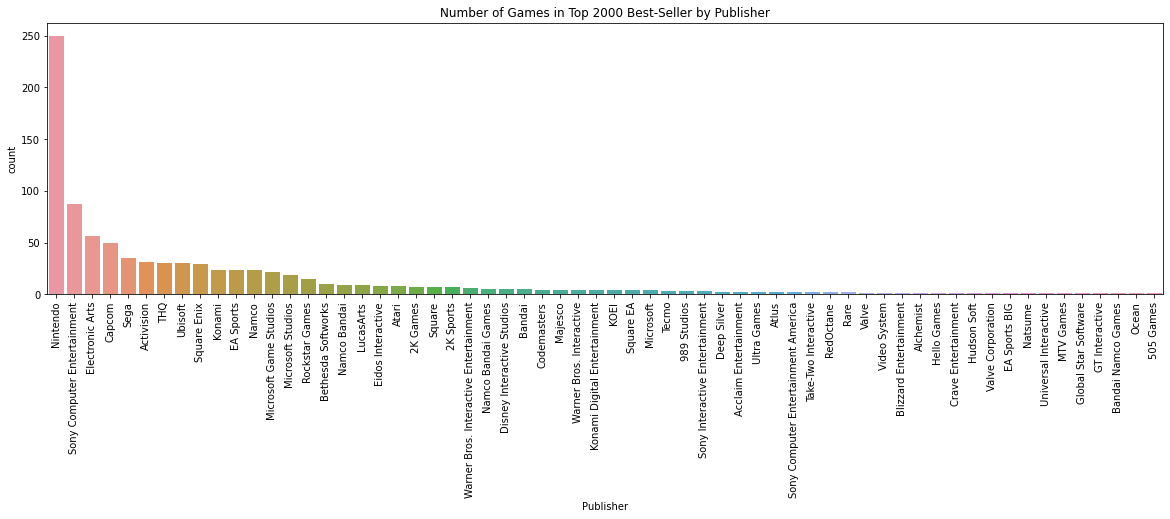

In [6]:
plt.figure(figsize = (20, 5))
plt1 = sbn.countplot(x = "Publisher", data = df, order = df['Publisher'].value_counts().index)
plt1.set_title('Number of Games in Top 2000 Best-Seller by Publisher')

plt.xticks(rotation = 90)
totalSalesByPublisher = df.groupby(by = ['Publisher'])['TotalSales'].sum()
totalSalesByPublisher = totalSalesByPublisher.reset_index()
totalSalesByPublisher = totalSalesByPublisher.sort_values(by = ['TotalSales'], ascending = False)

### Total sales of each publisher <a class="anchor" id="section_1_2"></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

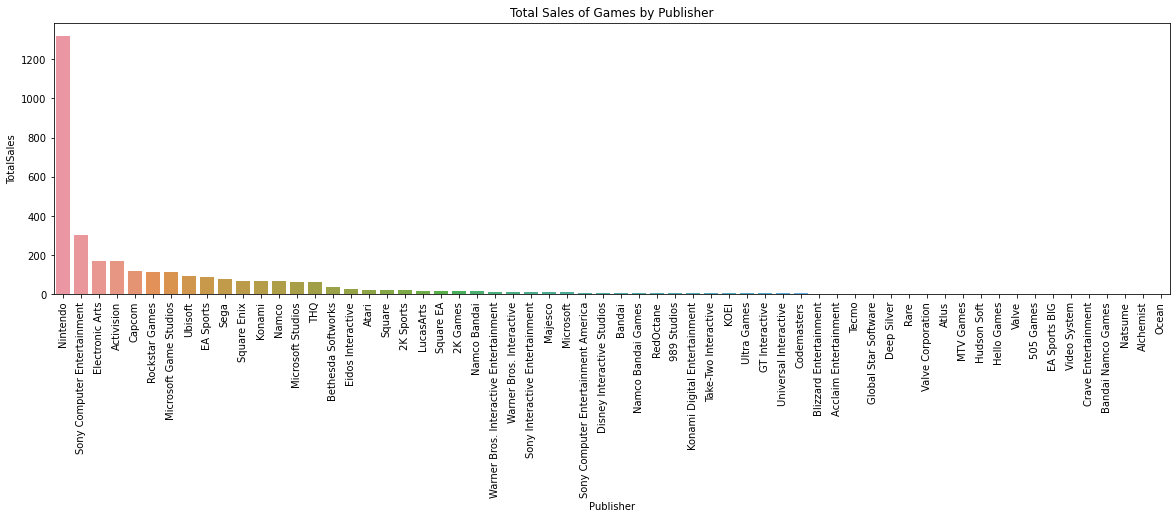

In [7]:
plt.figure(figsize = (20, 5))
plt2 = sbn.barplot(x = "Publisher", y = "TotalSales", data = totalSalesByPublisher)
plt2.set_title('Total Sales of Games by Publisher')
plt.xticks(rotation = 90)

It is more than obvious that Nintendo dominates the global market. With more than 300 games having a seat in the chart of top-2000 sellers, its total sales outweighs the company with second high total sales approximately 4 times. Another observation from comparing and constrasting these two graphs is that all companies are at about the same position in the bar chart, which means that for companies in top-2000 sellers, the more games they published, the more money they could make. <br>
This observation implicates a cycle in video game market. After a company successfully launched a popular game, its fans would be willing to try the next game made by the company, which ensures the sales of the next launch. As one of the most ealiest founded companies in the industry, Nintendo has already been on a advantageous place after its launch of Super Mario Seires in 1980s. And so it is not surprising that Nintendo has a overwhelming superiority over the others.

### Sales of each publisher by region <a class="anchor" id="section_1_3"></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

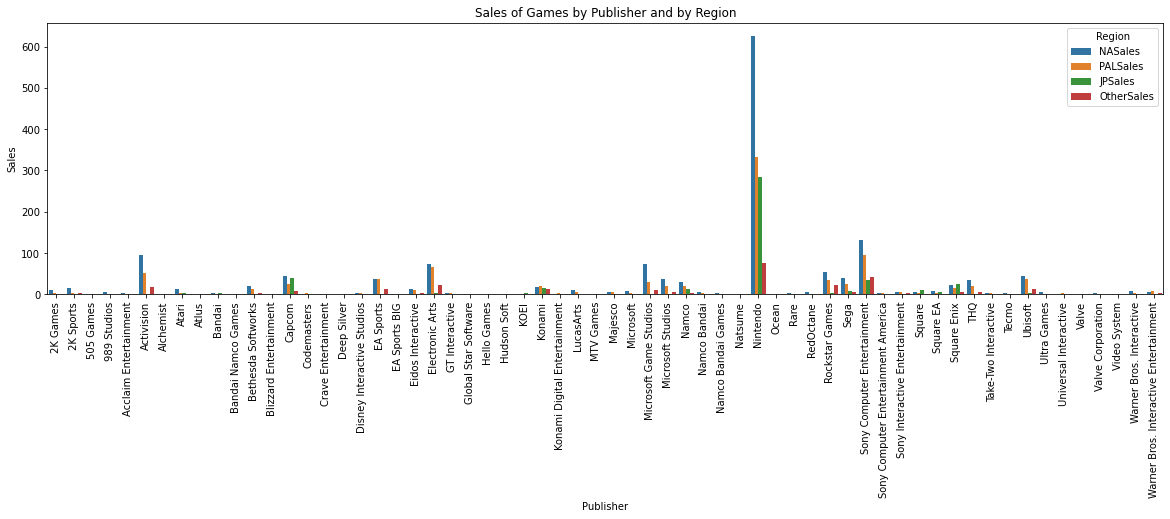

In [8]:
publisherSalesByRegion = df[['Publisher', 'NASales', 'PALSales', 'JPSales', 'OtherSales']].groupby(by = ['Publisher']).sum().reset_index()
publisherSalesByRegionData = pd.melt(publisherSalesByRegion, id_vars = ['Publisher'], value_vars = ['NASales', 'PALSales', 'JPSales', 'OtherSales'], var_name = 'Region', value_name = 'Sales')

plt.figure(figsize = (20, 5))
plt3 = sbn.barplot(x = 'Publisher', y = 'Sales', hue = 'Region', data = publisherSalesByRegionData)
plt3.set_title('Sales of Games by Publisher and by Region')

plt.xticks(rotation = 90)

### Total sales by region <a class="anchor" id="section_1_4"></a>

Text(0.5, 1.0, 'Regional Sales Pct')

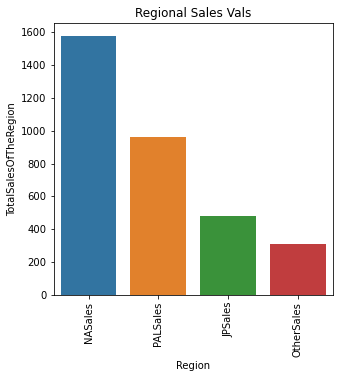

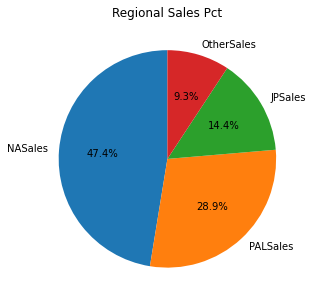

In [9]:
salesByRegion = df[['NASales', 'PALSales', 'JPSales', 'OtherSales']]
totalSalesByRegion = salesByRegion.sum().reset_index()
totalSalesByRegion = totalSalesByRegion.rename(columns = {"index": "Region", 0: "TotalSalesOfTheRegion"})

plt.figure(figsize = (5, 5))
plt4 = sbn.barplot(x = "Region", y = "TotalSalesOfTheRegion", data = totalSalesByRegion)
plt4.set_title('Regional Sales Vals')
plt.xticks(rotation = 90)

plt.figure(figsize=(5, 5))
plt5 = plt.pie(totalSalesByRegion['TotalSalesOfTheRegion'], labels = totalSalesByRegion['Region'], autopct = '%1.1f%%', startangle=90)
plt.title('Regional Sales Pct')

NA seems to be the largest market in the graph of sales of games by publisher and by region graph, and the bar chart as well as the pie chart further proven our guess. This is a bit counterintuitive because we thought that PAL sales would account for the largest portion. A noticable point is that although Japan's population accounts less than 2% of total population, Japan Sales accounts for 13.9% of total sales, which implicates the prosperity of Japanese Gaming Industry. 

### Released days with total sales for each region <a class="anchor" id="section_1_5"></a>

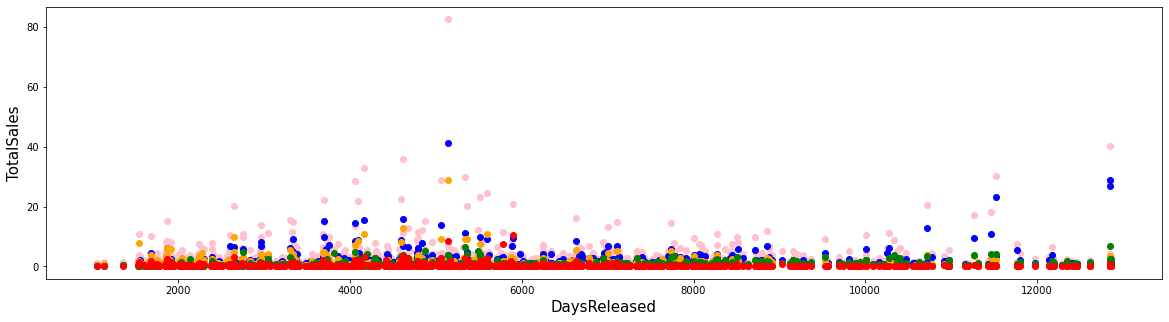

In [10]:
plt.figure(figsize = (20,5))
plt.scatter(df['DaysReleased'], df['TotalSales'], color = 'pink')
plt.scatter(df['DaysReleased'], df['NASales'], color = 'blue')
plt.scatter(df['DaysReleased'], df['PALSales'], color = 'orange')
plt.scatter(df['DaysReleased'], df['JPSales'], color = 'green')
plt.scatter(df['DaysReleased'], df['OtherSales'], color = 'red')

plt.xlabel("DaysReleased", fontsize = 15)
plt.ylabel("TotalSales", fontsize = 15)

plt.show()

We find that it is hard to find a meaningful relationship between the sales and the length of time the game has been published. i.e., a good game won't fade over time.

### Sales of games by release year <a class="anchor" id="section_1_6"></a>

In [11]:
groupByYear = df.groupby(["Year"])
dfGroupByYear = groupByYear.sum()
dfGroupByYear = dfGroupByYear.reset_index()

dfGroupByYear.head()

,Year,TotalSales,NASales,PALSales,JPSales,OtherSales,DaysReleased
0,1985,91.53,64.79,6.17,19.01,1.55,141382.0
1,1986,7.53,2.56,0.69,4.19,0.10,62621.0
2,1987,26.80,12.31,3.15,10.87,0.46,122596.0
3,1988,15.82,9.44,2.14,3.90,0.34,47320.0
4,1989,57.69,40.21,6.24,10.10,1.14,68912.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

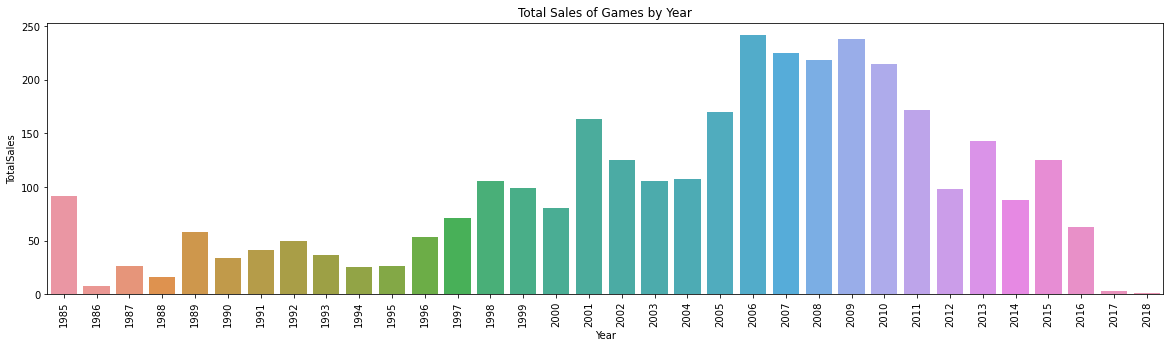

In [12]:
plt.figure(figsize = (20, 5))
plt6 = sbn.barplot(x = "Year", y = "TotalSales", data = dfGroupByYear)
plt6.set_title('Total Sales of Games by Year')
plt.xticks(rotation = 90)

The gaming industry has experienced a continuous growth from 1995, reaching a peak in 2009, and the sales was on a decline since then. It is noticable that the sales of games published in 1985 is significantly greater than its neighbours. It was the year when Super Mario Bro was launched, which is still in Top 10 best sellers in 2020. How impressive!

### Number of games released by year <a class="anchor" id="section_1_7"></a>

In [13]:
countByYear = df.groupby(["Year"]).count()
countByYear = countByYear.reset_index()
countByYear["TotalSales"] = dfGroupByYear["TotalSales"]

countByYear.head()

,Year,Game,Publisher,TotalSales,NASales,PALSales,JPSales,OtherSales,ReleaseDate,LinkToPage,DaysReleased,Platform,Genre
0,1985,11,11,91.53,11,11,11,11,11,11,11,11,11
1,1986,5,5,7.53,5,5,5,5,5,5,5,5,5
2,1987,10,10,26.80,10,10,10,10,10,10,10,10,10
3,1988,4,4,15.82,4,4,4,4,4,4,4,4,4
4,1989,6,6,57.69,6,6,6,6,6,6,6,6,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

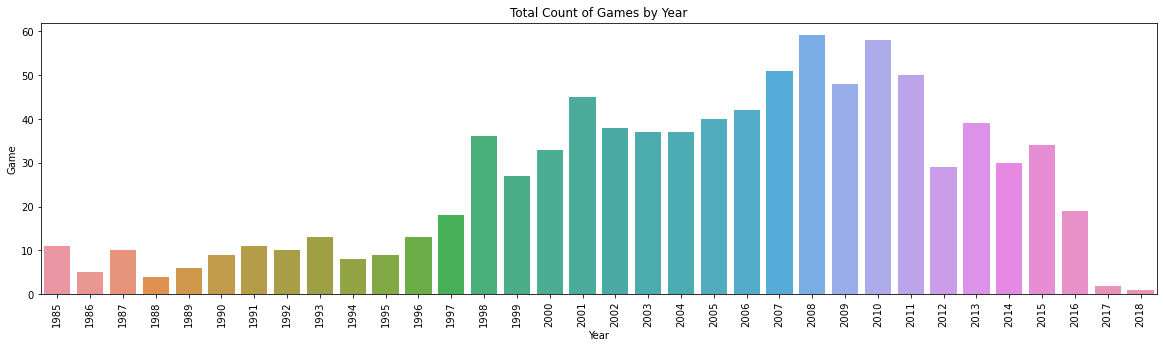

In [14]:
plt.figure(figsize = (20, 5))
plt7 = sbn.barplot(x = "Year", y = "Game", data = countByYear)
plt7.set_title('Total Count of Games by Year')
plt.xticks(rotation = 90)

We can see that there is most number of games released in 2008 in top 2000 sellers, which is surprising. During the particularly hard period of global financial crisis in 2008, the gaming industry still kept growing prosperously, and so many masterpiece was released this year. It is noticable that the number of games before 2000 and after 2016 are much less than the rest. Before 2000, the limitation of technology might be the reason. Game makers don't have techniques to make fancy games with nice scene or music like what we could see today. After 2016, the reason might be that the gaming industry has reached a market saturation, i.e., there are already too many masterpiece products in each genre, so that it is more difficult for the newly-launched games to take over the place. So we decided to look into each genre.

### Genre and Sales <a class="anchor" id="section_1_8"></a>

In [15]:
groupByGenre = df.groupby(["Genre"])
dfGroupByGenre = groupByGenre.sum()
dfGroupByGenre = dfGroupByGenre.reset_index()

dfGroupByGenre

,Genre,TotalSales,NASales,PALSales,JPSales,OtherSales,DaysReleased,Year
0,Action,602.29,278.73,191.92,57.71,73.90,1014285.0,379079
1,Adventure,52.86,24.73,15.60,8.52,4.01,118492.0,40081
2,Fighting,160.70,80.32,38.75,28.62,12.99,377984.0,116147
3,Misc,246.17,115.95,75.03,35.03,20.18,299830.0,112317
4,Platform,504.13,261.24,118.37,96.17,28.29,770221.0,224172
5,Puzzle,109.42,51.36,24.56,28.12,5.36,228171.0,66050
6,Racing,329.68,142.58,109.63,40.24,37.23,438724.0,150325
7,Role-Playing,285.73,113.60,61.07,90.18,20.89,466568.0,184601
8,Shooter,460.66,268.21,131.66,15.90,44.78,529071.0,224834
9,Simulation,123.07,46.37,40.70,26.46,9.51,186676.0,68179


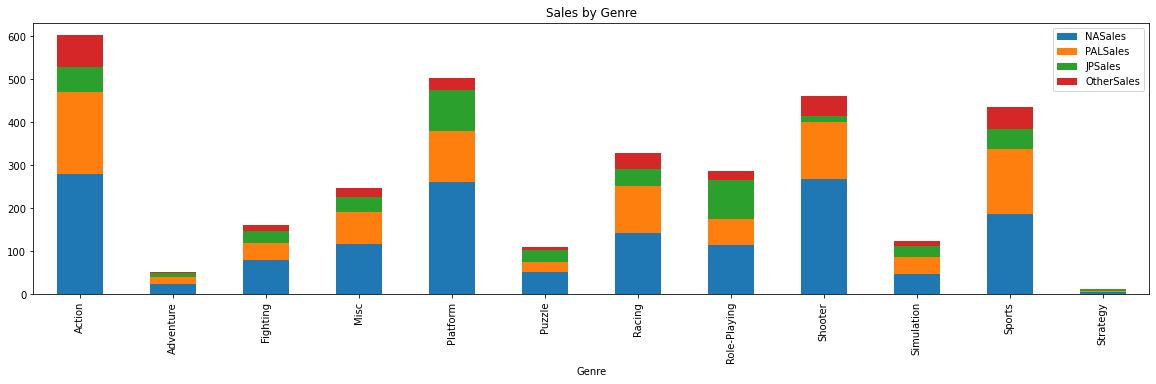

In [16]:
plt8 = dfGroupByGenre[['NASales','PALSales','JPSales','OtherSales']].plot.bar(stacked = True, figsize = (20,5))
plt8.set_xlabel('Genre')
plt8.set_title('Sales by Genre')

locs, labels = plt.xticks()
new_xticks = dfGroupByGenre['Genre']
plt.xticks(locs, new_xticks, rotation = 90)

plt.show()

We could see that Action games is the most popular genre among all, with Platform, Shooter, and Sports closely following. Strategy is the least popular genre on the other hand. One interesting data is that it seems like Japanese players have little interests in Shooter games compared to rest of the players. On the contraty, they have a crush on Role-Playing games.

### Platform and Sales <a class="anchor" id="section_1_9"></a>

In [17]:
groupByPlatform = df.groupby(["Platform"])
dfGroupByPlatform = groupByPlatform.sum()
dfGroupByPlatform = dfGroupByPlatform.reset_index()
dfGroupByPlatform = dfGroupByPlatform.drop(columns = ['Year', 'DaysReleased'])

dfGroupByPlatform.head()

,Platform,TotalSales,NASales,PALSales,JPSales,OtherSales
0,2600,1.22,0.27,0.08,0.85,0.02
1,3DS,109.05,37.35,34.55,30.45,6.64
2,DC,4.74,2.19,1.08,1.31,0.15
3,DS,269.48,93.18,86.02,67.65,22.62
4,GB,142.89,77.93,26.04,33.48,5.43


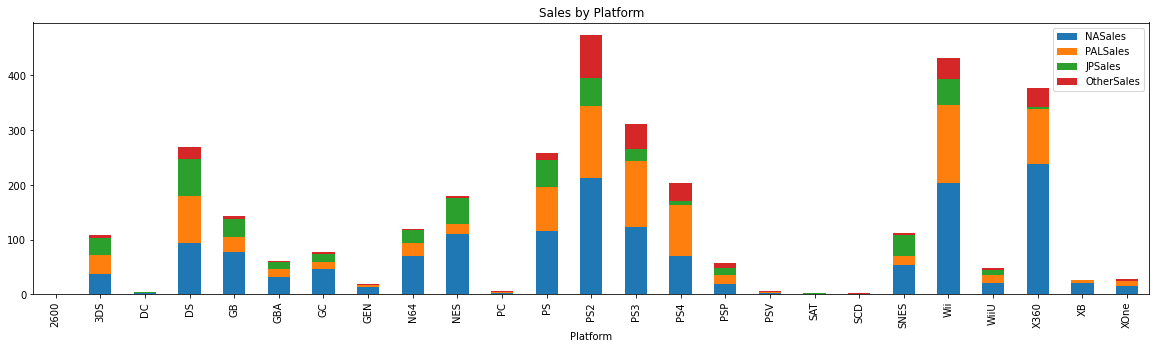

In [18]:
plt9 = dfGroupByPlatform[['NASales','PALSales','JPSales','OtherSales']].plot.bar(stacked = True, figsize = (20,5))
plt9.set_xlabel('Platform')
plt9.set_title('Sales by Platform')

locs, labels = plt.xticks()
new_xticks = dfGroupByPlatform['Platform']
plt.xticks(locs,new_xticks, rotation = 90)

plt.show()

PS2 is the most popular platform for top 2000 best-selling video games and PlayStation products obviously dominate the market for now. We could see a big difference between different platforms.

### Data Analysis <a class="anchor" id="chapter3"></a>

#### Linear Regression <a class="anchor" id="section_2_2"></a>

In [19]:
genreCount = pd.get_dummies(df['Genre'])
saleWGenreCount = pd.concat([df['TotalSales'], genreCount],axis = 1)

saleWGenreCount.head()

,TotalSales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1,82.65,0,0,0,0,0,0,0,0,0,0,1,0
2,40.24,0,0,0,0,1,0,0,0,0,0,0,0
4,35.98,0,0,0,0,0,0,1,0,0,0,0,0
5,32.90,0,0,0,0,0,0,0,0,0,0,1,0
6,30.26,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
X = saleWGenreCount.drop("TotalSales", axis = 1)
X = StandardScaler().fit_transform(X)
y = df["TotalSales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # split the dataset

In [21]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv = 10, scoring = 'neg_mean_squared_error')

print('Negative Mean Squared Error (Linear):', scores.mean())

Negative Mean Squared Error (Linear): -29.987393035313875


#### Quadratic (Polynomial) Regression <a class="anchor" id="section_2_3"></a>

In [22]:
feat = PolynomialFeatures(degree = 2)
Xquad = feat.fit_transform(X)
reg = LinearRegression()
scores = cross_val_score(reg, Xquad, y, cv = 10, scoring = 'neg_mean_squared_error')

print('Negative Mean Squared Error (Polynomial):', scores.mean())

Negative Mean Squared Error (Polynomial): -33.500950669108036


#### Stochastic Gradient Descent <a class="anchor" id="section_2_4"></a>

In [23]:
reg = SGDRegressor(loss = 'squared_loss')
scores = cross_val_score(reg, X, y, cv = 10, scoring = 'neg_mean_squared_error')

print('Negative Mean Squared Error (SGD):', scores.mean())

Negative Mean Squared Error (SGD): -27.985200311410598


We will want to pick the SGD model which result has a higher NMSE of -28.035387326224985 since a higher return value is better than a lower return value, which measures the distance between the model and the data.

Mean Squared Error : 25281.937450866266
Mean Absolute Error : 133.09556472881644


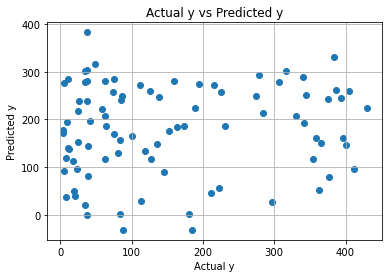

In [32]:
clf = SGDRegressor()
clf.fit(x_train, y_train)

plt.scatter(y_test, clf.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual y vs Predicted y')

print('Mean Squared Error :', mean_squared_error(y_test, clf.predict(x_test)))
print('Mean Absolute Error :', mean_absolute_error(y_test, clf.predict(x_test)))

plt.show()

#### OLS Regression <a class="anchor" id="section_2_1"></a>

In [25]:
results = smf.ols('TotalSales ~ Game + Genre + Platform + Publisher', data = countByYear).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalSales   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.27e-15
Time:                        02:57:12   Log-Likelihood:                -158.70
No. Observations:                  34   AIC:                             321.4
Df Residuals:                      32   BIC:                             324.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9565      8.186     -0.117      0.908     -17.631      15.718
Game           0.9511      0.066     14.506      0.000       0.818       1.085
Genre          0.9511      0.066     14.506      0.000       0.818       1.085
Platform       0.9511      0.066     14.506      0.000       0.818       1.085
Publisher      0.9511      0.066     14.506      0.000       0.818       1.085
==============================================================================
Omnibus:                       13.466   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.989
Skew:                           1.249   Prob(JB):                     0.000917
Kurtosis:                       4.907   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value, 1.27e-15, is less than 0.05, which indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. Therefore, there is a relationship between number of game released and the global sales of video games. And on average, the global sales of games increase by 0.9511m for every released game.

In [26]:
results = smf.ols('TotalSales ~ DaysReleased', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalSales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4280
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.513
Time:                        02:57:12   Log-Likelihood:                -2663.4
No. Observations:                 882   AIC:                             5331.
Df Residuals:                     880   BIC:                             5340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5316      0.397      8.892      0.000       2.752       4.311
DaysReleased  4.141e-05   6.33e-05      0.654      0.513   -8.28e-05       0.000
==============================================================================
Omnibus:                     1184.666   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259262.847
Skew:                           7.074   Prob(JB):                         0.00
Kurtosis:                      85.793   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We had guessed that there is no relationship between days released and sales in the previous section, and now the p-value backs our guess. The p-value here is 0.513, which could prove the null hypothesis.

In [27]:
le = LabelEncoder()
ledf = df.apply(LabelEncoder().fit_transform)

X = ledf[['Platform', 'Genre', 'Publisher']].values
y = ledf[['TotalSales']].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

reg = LinearRegression()
reg.fit(x_train, y_train)

preds = reg.predict(x_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, preds))
test_set_r2 = r2_score(y_test, preds)

print(test_set_rmse)
print(test_set_r2)

result = sm.OLS(y, X).fit()
result.summary()

135.1295179356321
0.007105190251113336


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              411.2
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   7.64e-167
Time:                        02:57:12   Log-Likelihood:                         -5525.7
No. Observations:                 882   AIC:                                  1.106e+04
Df Residuals:                     879   BIC:                                  1.107e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.2702      0.570      7.488      0.000       3.151       5.390
x2             5.6047      1.140      4.918      0.000       3.368       7.842
x3             1.9247      0.208      9.242      0.000       1.516       2.333
==============================================================================
Omnibus:                       78.179   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.329
Skew:                           0.504   Prob(JB):                     9.67e-13
Kurtosis:                       2.301   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
accuracy = cross_val_score(reg, X, y, cv = 10)
print(accuracy.mean())

-265.17020852982967


It seems like that the accuracy is not acceptable and the sales is not related with platform, genre, or publisher.

### Conclusion <a class="anchor" id="chapter4"></a>

This analysis reveals some surprising facts. We could see that there is not a very strong relationship between total sales and genre, platform, and publisher. While it might seem obvious that the game that released early contributes more to total sales, we do not find an apparent connection between them.

However, it also worth mention that Nintendo almost monopolized the market, whose sales greatly exceed the sales of others.

### Other links <a class="anchor" id="chapter5"></a>

Data of games avaliable on steam: https://steamdb.info/